In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.utils import *
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools


In [2]:
path = Path("D:\level 3\material\myProject\crop_part1")
filenames = list(map(lambda x: x.name, path.glob('*.jpg')))

In [3]:
print("length of file : " ,len(filenames))
print("First 3 files : " , filenames[:3])

length of file :  9780
First 3 files :  ['100_1_0_20170110183726390.jpg.chip.jpg', '100_1_2_20170105174847679.jpg.chip.jpg', '101_1_2_20170105174739309.jpg.chip.jpg']


In [4]:
np.random.seed(10)
np.random.shuffle(filenames)

In [5]:
age_labels, image_path = [] , []

for filename in filenames:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])

In [6]:
df = pd.DataFrame()
df['image'], df['age'] = image_path, age_labels  

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
     

from tensorflow.keras import *
from tensorflow.keras.utils import *

C:\Users\Youss\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

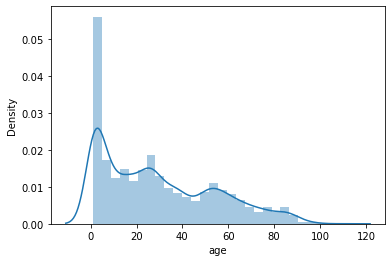

In [8]:

#ages plot
sns.distplot(df.age)

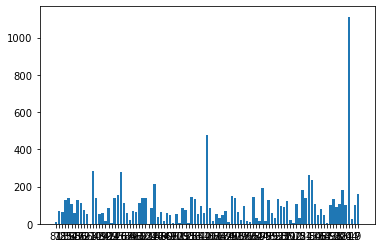

Max value: 99


In [9]:
x_ages = list(set(age_labels))
y_ages = [age_labels.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.show()
print("Max value:",max(age_labels)) 

In [10]:
age_labels=np.array(age_labels)

In [11]:

# Age classification to 10 classes
classes_of_ages = []
for i in age_labels:
    i = int(i)
    if i <= 10:
        classes_of_ages.append("0")
    if (i>10) and (i<=20):
        classes_of_ages.append("1")
    if (i>20) and (i<=30):
        classes_of_ages.append("2")
    if (i>30) and (i<=40):
        classes_of_ages.append("3")
    if (i>40) and (i<=50):
        classes_of_ages.append("4")
    if (i>50) and (i<=60):
        classes_of_ages.append("5")
    if (i>60) and (i<=70):
        classes_of_ages.append("6")
    if (i>70) and (i<=80):
        classes_of_ages.append("7")
    if (i>80) and (i<=90):
        classes_of_ages.append("8")
    if (i>90) :
        classes_of_ages.append("9")

In [12]:
        
#age dictionary
age_dic={ "0":'under 10',"1":'under 20' ,"2":'under 30' ,"3":'under40' ,"4":'under 50' ,"5":'under60' ,"6":'under 70' ,"7":'under 80' ,"8":'under 90' ,"9":'grater than 90' }
age_dic["0"]


'under 10'

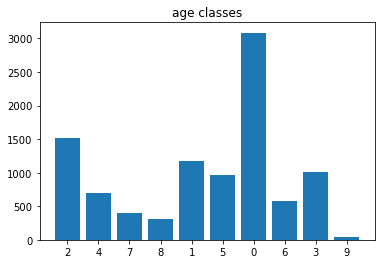

In [13]:

#age_classes plot  
import matplotlib.pyplot as plt
x_ages = list(set(classes_of_ages))
y_ages = [classes_of_ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.title("age classes")
plt.show()



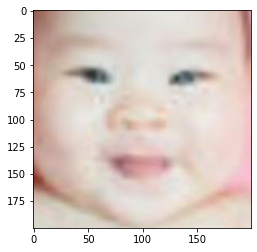

In [14]:

# showing the image wit index 15426
img = Image.open("D:\level 3\material\myProject\crop_part1/"+df.image[154])
plt.imshow(img)


In [15]:
def convert_age(i): 
        if i <= 10:
            return 0
        if (i>10) and (i<=20):
            return 1
        if (i>20) and (i<=30):
            return 2
        if (i>30) and (i<=40):
            return 3
        if (i>40) and (i<=50):
            return 4
        if (i>50) and (i<=60):
             return 5
        if (i>60) and (i<=70):
             return 6
        if (i>70) and (i<=80):
             return 7
        if (i>80) and (i<=90):
             return 8
        if (i>90) :
             return 9

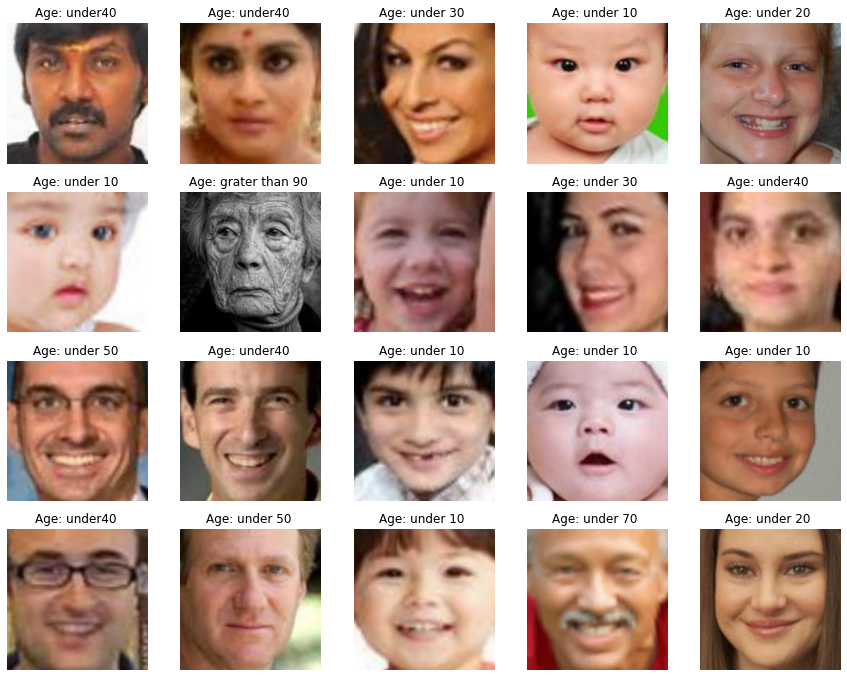

In [16]:
            
files = df.iloc[0:20]
plt.figure(figsize=(15,15))
for index, file ,classes in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img("D:\level 3\material\myProject\crop_part1/"+file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age_dic[str(convert_age(int(classes)))]} ")
    plt.axis('off')

In [17]:
classes_of_ages[:12]

#splitting data
train, test = train_test_split(df, train_size=0.75, random_state=0)

test.head(6)

,image,age
3460,67_1_3_20170109151006621.jpg.chip.jpg,67
5359,65_0_2_20161219193311243.jpg.chip.jpg,65
6067,18_1_3_20170104221905278.jpg.chip.jpg,18
7105,7_0_0_20170110225109143.jpg.chip.jpg,7
8678,80_0_0_20170111211700924.jpg.chip.jpg,80
8409,16_0_0_20170110232315216.jpg.chip.jpg,16


In [18]:
x_train = []

for file in train.image:
    img = load_img("D:\level 3\material\myProject\crop_part1/"+file,grayscale=True)
    img = img.resize((64,64), Image.ANTIALIAS)
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)
x_train = x_train.reshape(len(x_train),64,64,1)
x_train.shape

C:\Users\Youss\anaconda3\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


(7335, 64, 64, 1)

In [19]:
x_test = []
for file in test.image:
    img = load_img("D:\level 3\material\myProject\crop_part1/"+file,grayscale=True)
    img = img.resize((64,64), Image.ANTIALIAS)
    img = np.array(img)
    x_test.append(img)

x_test = np.array(x_test)
x_test = x_test.reshape(len(x_test), 64,64,1)
x_test.shape

(2445, 64, 64, 1)

In [21]:
y_age_train = []
for file in train.age:
    Ages = file
    y_age_train.append(convert_age(int(Ages)))

y_age_train=np.array(y_age_train)

In [22]:
y_age_test = []
for file in test.age:
    Ages = file
    y_age_test.append(convert_age(int(Ages)))

y_age_test=np.array(y_age_test)

In [23]:
#model = Model(inputs=[inputs], outputs=[output])
X_valid, X_train = x_train[:2350], x_train[2350:] 
y_valid, y_train = y_age_train[:2350], y_age_train[2350:]

In [24]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                               patience=10 ,
                                               verbose=1 , 
                                               mode="auto" ,
                                               restore_best_weights=True
    )

In [27]:
input = layers.Input(shape = (64,64, 1))

output = layers.Flatten()(input)
output = layers.Dense(700, activation = "relu")(output)
output = layers.Dense(700, activation = "relu")(output)
output = layers.Dense(350, activation = "relu")(output)
output = layers.Dense(350, activation = "relu")(output)
output = layers.Dense(175, activation = "relu")(output)
output = layers.Dense(10, activation = "softmax")(output)
model = models.Model(inputs = input, outputs = output)

In [28]:
model.compile(optimizer = 'adam', loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 700)               2867900   
                                                                 
 dense_7 (Dense)             (None, 700)               490700    
                                                                 
 dense_8 (Dense)             (None, 350)               245350    
                                                                 
 dense_9 (Dense)             (None, 350)               122850    
                                                                 
 dense_10 (Dense)            (None, 175)               61425 

In [33]:


history = model.fit(x_train,y_age_train,epochs = 100 ,batch_size=128,callbacks=[early_stop],validation_data=(X_valid,y_valid))


Epoch 1/100
58/58 [==============================] - 21s 367ms/step - loss: 1.1797 - accuracy: 0.5545 - val_loss: 1.0701 - val_accuracy: 0.5945
Epoch 2/100
58/58 [==============================] - 11s 191ms/step - loss: 1.2110 - accuracy: 0.5427 - val_loss: 1.2285 - val_accuracy: 0.5485
Epoch 3/100
58/58 [==============================] - 11s 196ms/step - loss: 1.2467 - accuracy: 0.5354 - val_loss: 1.4467 - val_accuracy: 0.4826
Epoch 4/100
58/58 [==============================] - 11s 192ms/step - loss: 1.2504 - accuracy: 0.5235 - val_loss: 1.0934 - val_accuracy: 0.5809
Epoch 5/100
58/58 [==============================] - 11s 182ms/step - loss: 1.1655 - accuracy: 0.5575 - val_loss: 1.2421 - val_accuracy: 0.5523
Epoch 6/100
58/58 [==============================] - 10s 174ms/step - loss: 1.2203 - accuracy: 0.5412 - val_loss: 1.1672 - val_accuracy: 0.5685
Epoch 7/100
58/58 [==============================] - 10s 174ms/step - loss: 1.2119 - accuracy: 0.5357 - val_loss: 1.1078 - val_accuracy:

In [35]:

score = model.evaluate(x_test, y_age_test, verbose=0)

print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.5186094045639038


In [36]:
y2 = model.predict(x_test,verbose=1)
y_pred = np.argmax(y2, axis = 1)

77/77 [==============================] - 4s 52ms/step


In [37]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


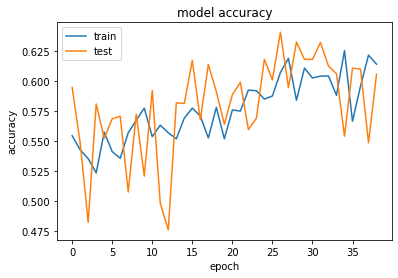

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

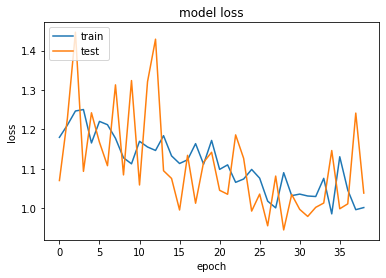

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

C:\Users\Youss\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

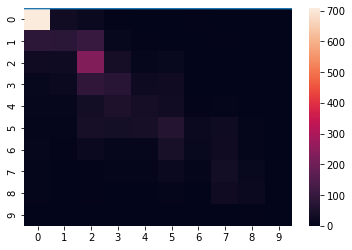

In [45]:

cm = confusion_matrix( y_age_test ,y_pred)
sns.distplot(cm)
cm
sns.heatmap(cm)

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

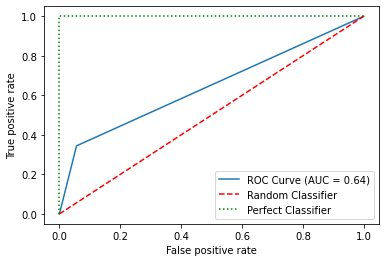

In [46]:
  
from sklearn.metrics import roc_curve,auc
fpr_sum = np.zeros(3)
tpr_sum = np.zeros(3)
for class_num in range(10):
  predications = []
  true_labels = []
  for i in range(2445):
    if(y_pred[i] == class_num):
      predications.append(1)
    else:
      predications.append(0)

    if(y_age_test[i] == class_num):
      true_labels.append(1)
    else:
      true_labels.append(0)

  predications = np.array(predications)
  true_labels = np.array(true_labels)
  fpr,tpr,_ = roc_curve(true_labels,predications)
  fpr_sum += fpr
  tpr_sum += tpr

fpr = fpr_sum / 10
tpr = tpr_sum / 10

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()  